In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy.linalg as la
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, matthews_corrcoef,log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
path = "/content/drive/Shareddrives/DATA 270/data_270_dataset.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Solar Radiation Average,Average Soil Temperature,Maximum Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Maximum Relative Humidity,Dew Point,month,year,county_encoded,week,DSCI,class
0,134.750000,47.950000,57.275000,8.300000,0.0,0.0,92.500000,39.550000,1,2000,0.0,1,61,0.0
1,112.857143,50.271429,58.571429,9.557143,0.0,0.0,92.000000,42.414286,1,2000,0.0,2,50,0.0
2,105.428571,52.342857,60.757143,10.957143,0.0,0.0,96.857143,46.828571,1,2000,0.0,3,0,0.0
3,86.571429,55.185714,59.871429,12.957143,0.0,0.0,98.142857,51.257143,1,2000,0.0,4,0,0.0
4,154.857143,53.242857,60.957143,9.942857,0.0,0.0,93.142857,44.228571,2,2000,0.0,5,0,0.0


In [ ]:
train = df[df['year'] <= 2017]
test = df[df['year'] > 2017]
train.shape, test.shape

((39937, 14), (6907, 14))

In [ ]:
train = train.drop(['year','DSCI','Average Wind Speed','Precipitation'],axis=1)
test = test.drop(['year','DSCI','Average Wind Speed','Precipitation'],axis=1)

In [ ]:
train.head()

,Solar Radiation Average,Average Soil Temperature,Maximum Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Maximum Relative Humidity,Dew Point,month,county_encoded,week,class
0,134.750000,47.950000,57.275000,8.300000,0.0,0.0,92.500000,39.550000,1,0.0,1,0.0
1,112.857143,50.271429,58.571429,9.557143,0.0,0.0,92.000000,42.414286,1,0.0,2,0.0
2,105.428571,52.342857,60.757143,10.957143,0.0,0.0,96.857143,46.828571,1,0.0,3,0.0
3,86.571429,55.185714,59.871429,12.957143,0.0,0.0,98.142857,51.257143,1,0.0,4,0.0
4,154.857143,53.242857,60.957143,9.942857,0.0,0.0,93.142857,44.228571,2,0.0,5,0.0


In [ ]:
X_train= train.drop(['class'],axis=1)
y_train= train['class']

X_test = test.drop(['class'],axis=1)
y_test = test['class']

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.582928,-1.271001,-1.144010,-0.475835,-0.315707,-0.445007,0.606219,-0.558445,-1.604049,-1.810119,-1.702230
1,-1.702570,-1.057629,-1.049323,-0.239247,-0.315707,-0.445007,0.562057,-0.248480,-1.604049,-1.810119,-1.635828
2,-1.743166,-0.867235,-0.889686,0.024226,-0.315707,-0.445007,0.991061,0.229221,-1.604049,-1.810119,-1.569426
3,-1.846218,-0.605935,-0.954375,0.400616,-0.315707,-0.445007,1.104621,0.708467,-1.604049,-1.810119,-1.503023
4,-1.473045,-0.784512,-0.875079,-0.166657,-0.315707,-0.445007,0.662999,-0.052144,-1.313951,-1.810119,-1.436621


In [ ]:
svd = TruncatedSVD(n_components=3, algorithm='randomized',
                   random_state=0)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.fit_transform(X_test)

In [ ]:
X_svd_train = pd.DataFrame(X_svd_train)
X_svd_train.head()

,0,1,2
0,-2.926225,1.446274,0.058739
1,-2.603758,1.430085,0.266798
2,-2.241419,1.422294,0.851637
3,-1.883231,1.405773,1.322289
4,-2.115391,1.220315,0.349432


In [ ]:
# dfx_trans = pd.DataFrame(data=X_svd_train,)
# dfx_trans.head()
# svd_df = pd.concat([dfx_trans, df["class"]], axis=1)
# sns.pairplot(svd_df, hue="class")
# sc = StandardScaler()
# scaled = sc.fit_transform(X_test)

# svd = TruncatedSVD(n_components=4, algorithm='randomized',
#                    random_state=0)
# X_svd_test = svd.fit_transform(scaled)


In [ ]:
pca = PCA(n_components=4)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

In [ ]:
X_pca_train = pd.DataFrame(X_pca_train)
X_pca_train.head()

,0,1,2,3
0,-2.926225,1.446274,0.058739,1.962515
1,-2.603758,1.430085,0.266798,2.049768
2,-2.241419,1.422294,0.851637,2.236250
3,-1.883231,1.405773,1.322289,2.412813
4,-2.115391,1.220315,0.349432,2.061059


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_svd_train,y_train)

SVC()

In [ ]:
predicted=svc.predict(X_svd_test)
accuracy_score(y_test,predicted), matthews_corrcoef(y_test,predicted)

(0.5979441146662806, 0.0)

In [ ]:
predicted=svc.predict(X_pca_test)
accuracy_score(y_test,predicted)

0.4010424207325901

In [ ]:
model = ['ANN', 'KNN', 'Random Forest', 'SVC']
train_accuracy = [0.734, 0.702, 0.724, 0.674]
valid_accuracy = [0.727, 0.698, 0.701, 0.567]
test_accuracy = [0.728, 0.684, 0.715, 0.553]
d = {'model': ['ANN', 'KNN', 'Random Forest', 'SVC'], 'train_accuracy':[0.734, 0.702, 0.724, 0.674],
     'valid_accuracy' : [0.727, 0.698, 0.701, 0.567], 'test_accuracy': [0.728, 0.684, 0.715, 0.486]}
dif = pd.DataFrame(d)
dif

,model,train_accuracy,valid_accuracy,test_accuracy
0,ANN,0.734,0.727,0.728
1,KNN,0.702,0.698,0.684
2,Random Forest,0.724,0.701,0.715
3,SVC,0.674,0.567,0.486


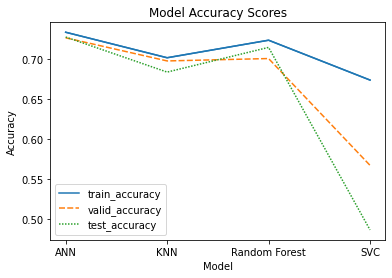

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.lineplot(data = dif, x = 'model', y='train_accuracy')
sns.lineplot(data = dif)
a.set_title('Model Accuracy Scores')
a.set_ylabel('Accuracy')
a.set_xlabel('Model')
plt.show()

In [2]:
import pandas as pd
d = {'model': ['ANN', 'KNN', 'Random Forest', 'SVC'], 'Precision':[0.719, 0.558, 0.708, 0.667],
     'Recall' : [0.720, 0.540, 0.698, 0.534], 'F1 Score': [0.709, 0.544, 0.7, 0.512]}
dif = pd.DataFrame(d)
dif

,model,Precision,Recall,F1 Score
0,ANN,0.719,0.720,0.709
1,KNN,0.558,0.540,0.544
2,Random Forest,0.708,0.698,0.700
3,SVC,0.667,0.534,0.512


In [ ]:
d = {'model': ['ANN', 'KNN', 'Random Forest', 'SVC'], 'train_mcc':[0.678, 0.642, 0.652, 0.667],
     'valid_mcc' : [0.665, 0.618, 0.641, 0.453], 'test_mcc': [0.658, 0.626, 0.639, 0.476]}
dif = pd.DataFrame(d)
dif

,model,train_mcc,valid_mcc,test_mcc
0,ANN,0.678,0.665,0.658
1,KNN,0.642,0.618,0.626
2,Random Forest,0.652,0.641,0.639
3,SVC,0.667,0.453,0.476


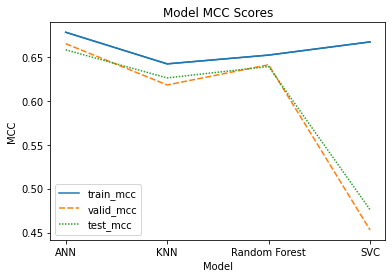

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.lineplot(data = dif, x = 'model', y='train_mcc')
a = sns.lineplot(data = dif)
a.set_title('Model MCC Scores')
a.set_ylabel('MCC')
a.set_xlabel('Model')
plt.show()

In [ ]:
d = {'model': ['ANN', 'KNN', 'Random Forest', 'SVC'], 'All Features':[0.728, 0.684, 0.715, 0.486],
     'PCA' : [0.428, 0.384, 0.315, 0.253], 'SVD': [0.528, 0.484, 0.515, 0.553]}
dif = pd.DataFrame(d)
dif

,model,All Features,PCA,SVD
0,ANN,0.728,0.428,0.528
1,KNN,0.684,0.384,0.484
2,Random Forest,0.715,0.315,0.515
3,SVC,0.486,0.253,0.553


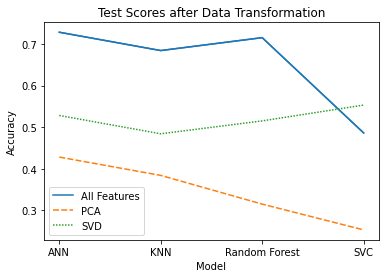

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.lineplot(data = dif, x = 'model', y='All Features')
a = sns.lineplot(data = dif)
a.set_title('Test Scores after Data Transformation')
a.set_ylabel('Accuracy')
a.set_xlabel('Model')
plt.show()